In [3]:
## LIBS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## READ DATA
main = pd.read_csv(r'Student Depression Dataset.csv')
main

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [39]:
## REMOVING ID

main = main.drop(['id'], axis=1)

## CHANGING CATERORICAL TO NUMERICAL (GENDER)


main.loc[main['Gender'] == 'Male', 'Gender'] = 0
main.loc[main['Gender'] == 'Female', 'Gender'] = 1
main


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,0,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,0,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,1,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [40]:
## CHECKING THE CITY NAMES AND COUNTS

main['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [41]:
## REMOVING CITIES WITH LESS THAN 400 STUDENTS


cities_to_remove = main['City'].value_counts()[main['City'].value_counts() < 400]
main = main[~main['City'].isin(cities_to_remove.index)]
main['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [42]:
## CHECKING THE PROFESSION NAMES AND COUNTS

main['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [43]:
## REMOVING PROFESSIONS != STUDENT DUE LOW COUNTS

main = main.loc[main['Profession'] == 'Student']
main['Profession'].value_counts()

Profession
Student    27844
Name: count, dtype: int64

In [44]:
## IF WE HAVE ONLY ONE PROFESSION, WE CAN DROP THE COLUMN

main = main.drop(['Profession'], axis=1)

In [45]:
## CHECKING THE WORK PRESSURE NAMES AND COUNTS


main['Work Pressure'].value_counts()

Work Pressure
0.0    27841
5.0        2
2.0        1
Name: count, dtype: int64

In [46]:
## REMOVING WORK PRESSURE DUE THE MAJORITY OF THE STUDENTS HAVE NO WORK PRESSURE


main = main.drop(['Work Pressure'], axis=1)
main

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,Surat,5.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,0,27.0,Ludhiana,2.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,0,31.0,Faridabad,3.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,1,18.0,Ludhiana,5.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [47]:
## CHECKING AGE DISTRIBUTION

main['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [48]:
## REMOVING STUDENTS OLDER THAN 30


main = main.loc[main['Age'] <= 30]
main['Age'].value_counts()

Age
24.0    2255
20.0    2235
28.0    2128
29.0    1940
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
27.0    1459
22.0    1159
26.0    1153
30.0    1144
Name: count, dtype: int64

In [49]:
## CHECKING THE ACADEMIC PRESSURE AND COUNTS


main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3546
2.0    3140
0.0       7
Name: count, dtype: int64

In [50]:
## REMOVING STUDENTS WITH NO ACADEMIC PRESSURE DUE LOW COUNTS


main = main.loc[main['Academic Pressure'] > 0]

main['Academic Pressure'].value_counts()

Academic Pressure
3.0    5785
5.0    5167
4.0    4112
1.0    3546
2.0    3140
Name: count, dtype: int64

In [51]:
## CHECKING THE STUDY SATISFACTION AND COUNTS


main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4448
1.0    4336
5.0    3453
0.0       2
Name: count, dtype: int64

In [52]:
## REMOVING STUDENTS WITH NO STUDY SATISFACTION DUE LOW COUNTS

main = main.loc[main['Study Satisfaction'] > 0]

main['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    4825
2.0    4686
3.0    4448
1.0    4336
5.0    3453
Name: count, dtype: int64

In [53]:
main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [54]:
## REMOVING JOB SATISFACTION DUE DROP PROFESSION COLUMN

main = main.drop(['Job Satisfaction'], axis=1)


main.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,1,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
3,1,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,1,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [55]:
## CHECKING THE SLEEP DURATION AND REMOVING 'OTHERS' DUW LOW COUNTS

main['Sleep Duration'].value_counts()
main = main.loc[main['Sleep Duration'] != 'Others']


In [56]:
## CHANGING SLEEP DURATION TO NUMERICAL

main.loc[main['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
main.loc[main['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
main.loc[main['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
main.loc[main['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
main['Sleep Duration'].value_counts()

Sleep Duration
0    6515
2    5732
1    4787
3    4702
Name: count, dtype: int64

In [57]:
## CHECKING DIEATARY HABITS AND REMOVING 'OTHERS' DUE LOW COUNTS

main['Dietary Habits'].value_counts()
main = main.loc[main['Dietary Habits'] != 'Others']
main['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8353
Moderate     7591
Healthy      5783
Name: count, dtype: int64

In [58]:
## CHANGING DIETARY HABITS TO NUMERICAL
main.loc[main['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
main.loc[main['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
main.loc[main['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
main['Dietary Habits'].value_counts()

Dietary Habits
1    8353
2    7591
0    5783
Name: count, dtype: int64

In [59]:
## CHECKING DEGREE NAMES

main['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'M.Ed', 'MSc',
       'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'ME',
       'MBA', 'LLB', 'Others', 'MHM'], dtype=object)

In [60]:
## CREATING NEW DEGREE COLUMN WITH ONLY GRADUATED, POST GRADUATED AND HIGHER SECONDARY

main.loc[main['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
main.loc[main['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
main.loc[main['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
main = main.loc[main['Degree'] != 'Others']

main['New_Degree'].value_counts()

New_Degree
Graduated           9782
Higher Secondary    5839
Post Graduated      4870
Name: count, dtype: int64

In [61]:
## CHANGING NEW DEGREE TO NUMERICAL

main.loc[main['New_Degree'] == 'Graduated', 'New_Degree'] = 0
main.loc[main['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
main.loc[main['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2

main['New_Degree'].value_counts()

New_Degree
0    9782
2    5839
1    4870
Name: count, dtype: int64

In [62]:
## CHECKING SUICIDAL THOUGHTS

main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    14265
No      7434
Name: count, dtype: int64

In [63]:
## CHANGING SUICIDAL THOUGHTS TO NUMERICAL
main.loc[main['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
main.loc[main['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
main['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
1    14265
0     7434
Name: count, dtype: int64

In [64]:
## CHECKING THE STUDY HOURS

main['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    3358
12.0    2443
11.0    2320
8.0     1928
6.0     1758
9.0     1601
7.0     1585
0.0     1272
2.0     1229
4.0     1224
3.0     1098
5.0      994
1.0      889
Name: count, dtype: int64

In [65]:
## CHECKING THE FINANCIAL STRESS
main['Financial Stress'].value_counts()

Financial Stress
5.0    5456
4.0    4614
3.0    4044
2.0    3900
1.0    3683
Name: count, dtype: int64

In [66]:
## CHECKING THE FAMILY HISTORY OF MENTAL ILLNESS

main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     11190
Yes    10509
Name: count, dtype: int64

In [67]:
## CHANGING FAMILY HISTORY OF MENTAL ILLNESS TO NUMERICAL
main.loc[main['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
main.loc[main['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
main['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
0    11190
1    10509
Name: count, dtype: int64

In [68]:
main = main.drop(['City'], axis=1)

main = main.drop(['Degree'], axis=1)

main

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1
5,0,29.0,2.0,5.70,3.0,0,0,0,4.0,1.0,0,0,NaN
6,0,30.0,3.0,9.54,4.0,2,0,0,1.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,0,23.0,3.0,6.00,2.0,3,0,1,12.0,4.0,0,0,NaN
27896,1,27.0,5.0,5.75,5.0,1,1,1,7.0,1.0,1,0,2
27897,0,27.0,2.0,9.40,3.0,0,0,0,0.0,3.0,1,0,1
27899,1,18.0,5.0,6.88,2.0,0,0,1,10.0,5.0,0,1,2


In [69]:
## CHECKING FOR NULL VALUES AND REMOVING
main.isnull().sum()
main = main.dropna()

## CREATING A NEW DF TO CHECK IF THERE IS ANY CORRELATION BETWEEN THE NUMERIC VARIABLES

main_data = main[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
main_data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1
6,0,30.0,3.0,9.54,4.0,2,0,0,1.0,2.0,0,0,0
7,1,30.0,2.0,8.04,4.0,0,1,0,0.0,1.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,1,24.0,3.0,6.02,2.0,2,2,0,8.0,2.0,0,0,0
27896,1,27.0,5.0,5.75,5.0,1,1,1,7.0,1.0,1,0,2
27897,0,27.0,2.0,9.40,3.0,0,0,0,0.0,3.0,1,0,1
27899,1,18.0,5.0,6.88,2.0,0,0,1,10.0,5.0,0,1,2


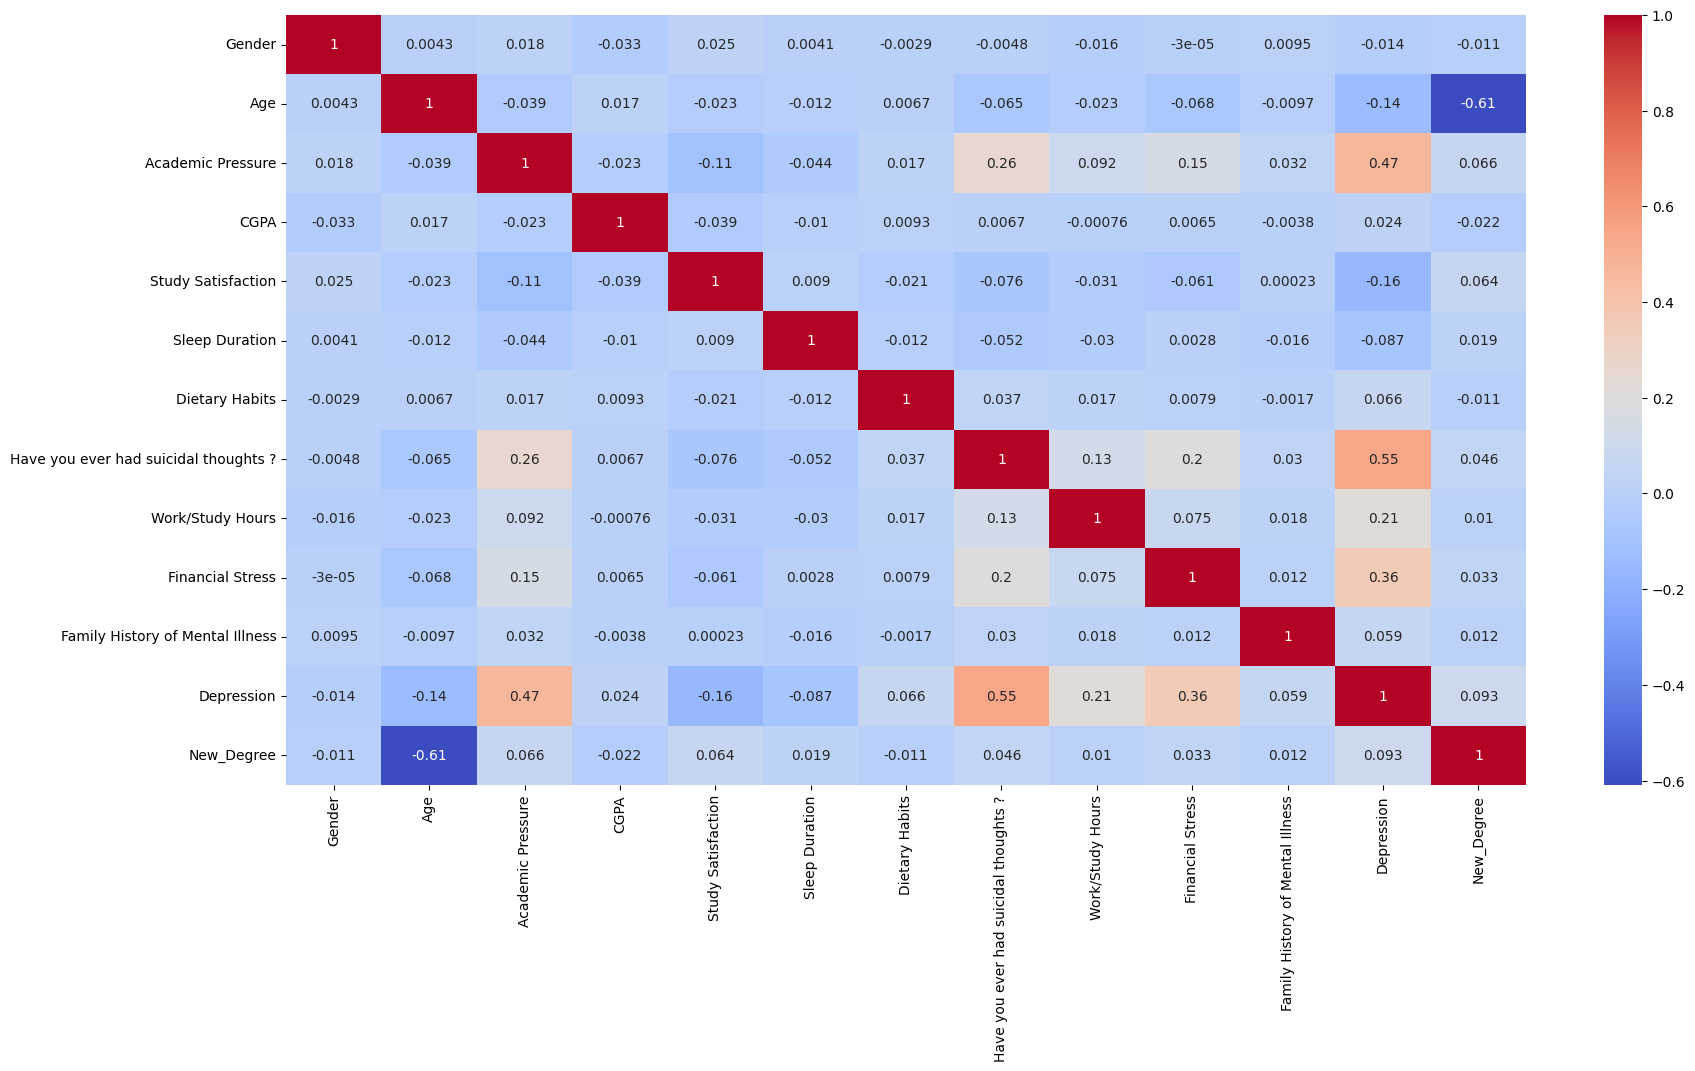

In [70]:
## PLOTTING THE CORRELATION MATRIX
plt.figure(figsize=(20, 10))
sns.heatmap(main_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [71]:
# ## CREATING DUMMY VARIABLES FOR THE CITY COLUMN

# encoder = OneHotEncoder(sparse_output=False)  
# encoded = encoder.fit_transform(main[['City']])
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))

# ## ADJUSTING THE INDEX

# encoded_df.index = main.index
# main_encoded = pd.concat([main, encoded_df], axis=1)

# ## CHECKING THE NEW DF
# main_encoded.columns

# # main_encoded

In [72]:
# ## REMOVING THE ORIGINAL CITY AND OLD DEGREE COLUMN

# main_encoded = main_encoded.drop(['City', 'Degree'], axis=1)

# main_encoded

In [73]:
## SPLITTING THE DATA INTO FEATURES AND TARGET

X = main_data.drop('Depression', axis=1).values
y = main_data['Depression'].values

## SPLITTING THE DATA INTO TRAIN AND TEST

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## NORMALIZING THE DATA FEATURES USING STANDARD SCALER

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TRAINING THE MODEL USING LOGISTIC REGRESSION

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

## SCORE

score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 85.11%


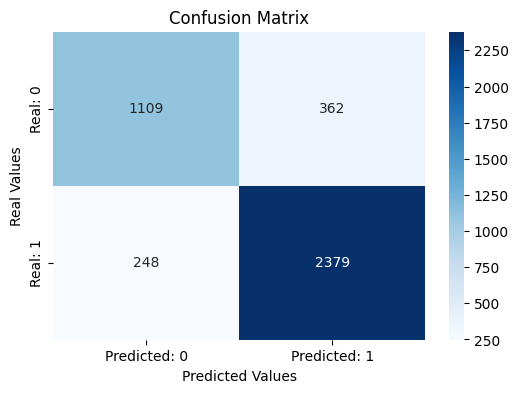

In [74]:
## PLLOTING THE CONFUSION MATRIX

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Real: 0', 'Real: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.show()

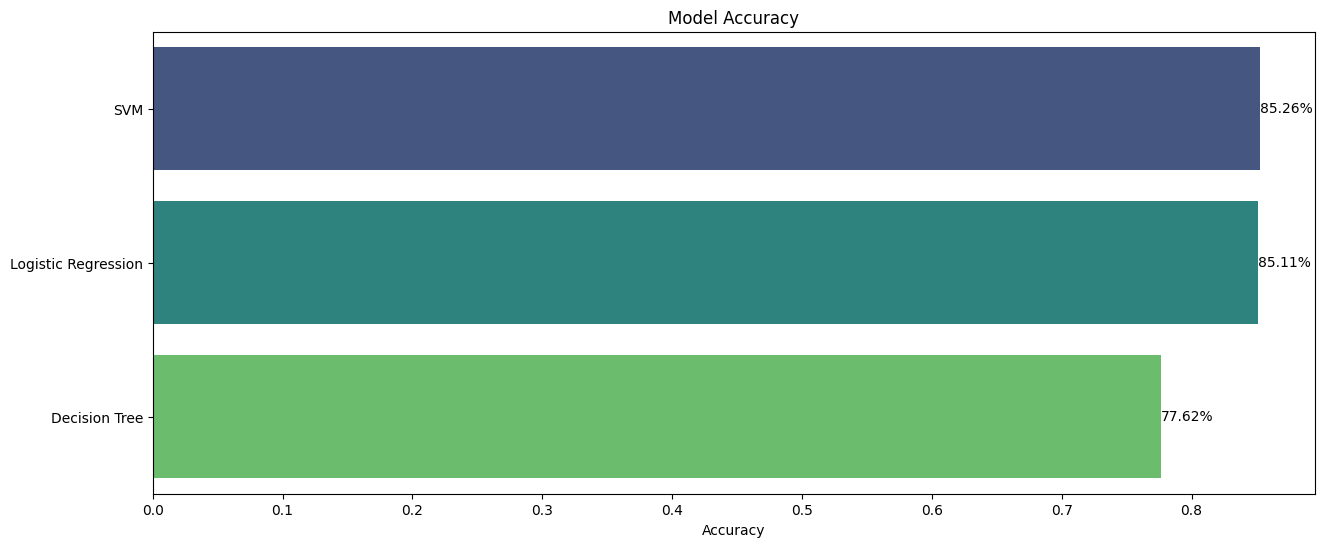

In [75]:
## COMPARING MULTIPLE MODELS TO CHECK THE BEST ONE

## MODELS

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
}

## TRAINING THE MODELS AND STORING THE ACCURACY

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled) 
    accuracy = accuracy_score(y_test, y_pred)  
    accuracy_results[name] = accuracy 

## ORDERING THE ACCURACY RESULTS FROM HIGHEST TO LOWEST

accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()), 
            y=list(accuracy_results_ordened.keys()), 
            palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()


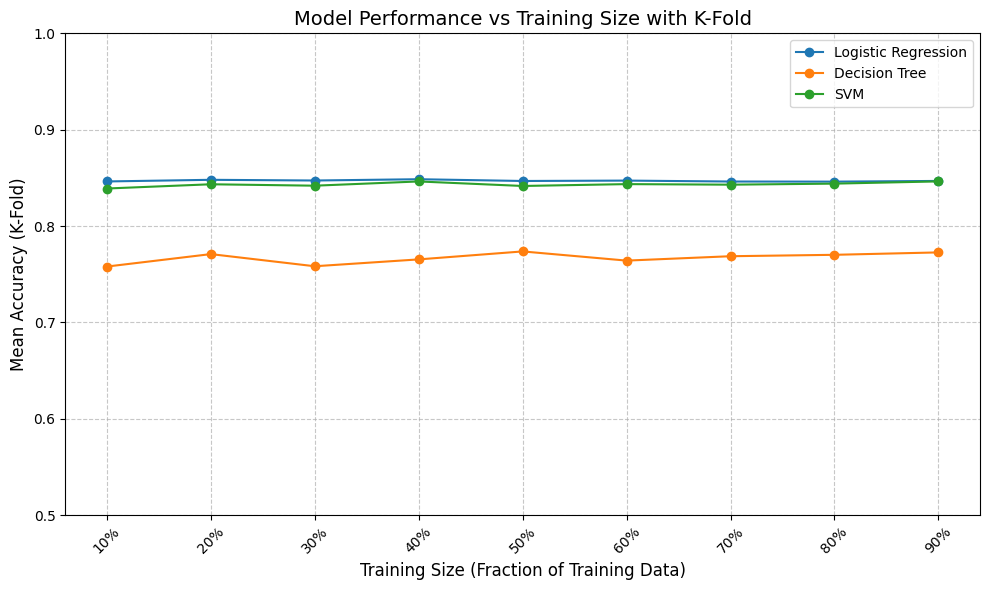

In [76]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Danh sách mô hình
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Khởi tạo K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu kết quả accuracy
results = {name: [] for name in models.keys()}
training_sizes = np.linspace(0.1, 0.9, 9)

# Vòng lặp với từng tỷ lệ dữ liệu huấn luyện
for size in training_sizes:
    # Chọn tập dữ liệu nhỏ hơn theo tỷ lệ
    X_partial, _, y_partial, _ = train_test_split(X_scaled, y, train_size=size, random_state=42)
    
    # Thực hiện K-Fold với từng mô hình
    for name, model in models.items():
        # cross_val_score thực hiện huấn luyện và đánh giá trên từng fold
        scores = cross_val_score(model, X_partial, y_partial, cv=kf, scoring=make_scorer(accuracy_score))
        results[name].append(scores.mean())  # Lấy trung bình của các fold

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for name, accuracies in results.items():
    plt.plot(training_sizes, accuracies, marker='o', label=name)

# Tùy chỉnh biểu đồ
plt.title("Model Performance vs Training Size with K-Fold", fontsize=14)
plt.xlabel("Training Size (Fraction of Training Data)", fontsize=12)
plt.ylabel("Mean Accuracy (K-Fold)", fontsize=12)
plt.xticks(training_sizes, labels=[f"{int(size*100)}%" for size in training_sizes], rotation=45)
plt.ylim(0.5, 1.0)  # Giới hạn trục tung từ 50% đến 100%
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train is a pandas DataFrame, you can get column names from it
column_names = ['Gender', 'Age', 'Academic Pressure',
                'CGPA', 'Study Satisfaction',
                'Sleep Duration', 'Dietary Habits', 'New_Degree', 
                'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 
                'Financial Stress', 'Family History of Mental Illness']

X_train = np.random.rand(100, 12)
y_train = np.random.randint(0, 2, size=100)

# Training logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Function to process user input and predict depression risk
def predict_depression(user_input):
    """
    Predicts depression risk based on user input.
    
    Parameters:
        user_input (dict): Dictionary containing user-provided information.

    Returns:
        str: Prediction result ('HAS SIGN OF DEPRESSION' or 'HAS NO SIGN OF DEPRESSION').
    """
    # Convert user input into a DataFrame
    input_df = pd.DataFrame([user_input])

    # Ensure input_df has the same structure as X_train by reindexing with column names
    input_df = input_df.reindex(columns=column_names, fill_value=0)

    # Make prediction
    prediction = logistic_model.predict(input_df)[0]

    return 'HAS SIGN OF DEPRESSION' if prediction == 1 else 'HAS NO SIGN OF DEPRESSION'

# Get user input from the keyboard
example_input = {
    'Gender': int(input("Gender (0 for Male, 1 for Female): ")),
    'Age': int(input("Age (18-30): ")),
    'Academic Pressure': int(input("Academic Pressure (0-5): ")),
    'CGPA': float(input("CGPA (0-10): ")),
    'Study Satisfaction': int(input("Study Satisfaction (0-5): ")),
    'Sleep Duration': int(input("Sleep Duration (0 for less than 5 hours, 1 for 5-6 hours, 2 for 7-8 hours, 3 for more than 8 hours): ")),
    'Dietary Habits': int(input("Dietary Habits (0 for healthy, 1 for unhealthy, 2 for moderate): ")),
    'New_Degree': int(input("Degree (0 for Graduated, 1 for Post Graduated, 2 for Higher Secondary): ")),
    'Have you ever had suicidal thoughts ?': int(input("Have you ever had suicidal thoughts ? (0 for No, 1 for Yes): ")),
    'Work/Study Hours': int(input("Work/Study Hours per day: ")),
    'Financial Stress': int(input("Financial Stress (0-5): ")),
    'Family History of Mental Illness': int(input("Family History of Mental Illness (0 for No, 1 for Yes): "))
}

# Make a prediction
result = predict_depression(example_input)
print(f">>>RESULT: {result}")


>>>RESULT: HAS NO SIGN OF DEPRESSION


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
